## Results Comparison

### First Prediction

The prediction shows a **prediction probability distribution that is very confident** (high probability) that the image belongs to **class 2 (Pullover)**. The prediction is made with near certainty, as indicated by the **tall blue bar** which dwarfs the probabilities for all other classes.

### Modified Prediction

Comparing the two images, the sample final test prediction for dataset element 0 does indeed differ between the two implementations:

- In the **first implementation**, the model predicts class 2 (Pullover) with high confidence.
- In the **second implementation**, the model predicts class 6 (Shirt) but also indicates a non-negligible probability for class 2 (Pullover).

The difference in predictions could be due to several factors:

1. **Model Architecture**: The modified implementation includes additional layers (Batch Normalization) and a different configuration for Dense layers (more neurons, He initialization). These changes can lead to a model learning different features from the data and, therefore, making different predictions.

2. **Loss Function and Optimizer**: The use of Mean Squared Error as a loss function in the second implementation is unconventional for classification tasks and might affect the model's ability to learn a proper decision boundary between classes. Moreover, RMSprop may converge differently than Adam, influencing the final weights learned by the model.

3. **Training Process**: The number of epochs and possibly the batch size could affect the training. Fewer epochs might not be enough for the modified model to converge to the best solution, especially given its more complex architecture.

In general, the modifications made to the model architecture, loss function, and optimizer in the modified implementation lead to a different set of learned weights, resulting in a different prediction for the same test image. This serves as an example of how sensitive neural network predictions can be to changes in model architecture and training process. The choice of Mean Squared Error might have particularly contributed to the reduced confidence in the predictions, as it's not typically used for classification tasks, where the goal is to predict the probability distribution over classes.

## Reapeating with 15 epochs

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Class names in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Scale the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model
model_ = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [5]:
# Compile the  model
model_.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

# Train the  model
model_.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5016 - accuracy: 0.8242
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3734 - accuracy: 0.8643
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3389 - accuracy: 0.8751
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8894
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2694 - accuracy: 0.8999
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2570 - accuracy: 0.9038
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9067
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.24

In [6]:
# Evaluate model
test_loss, test_acc = model_.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3277 - accuracy: 0.8902 - 680ms/epoch - 2ms/step

Test accuracy: 0.8902000188827515


In [8]:
# Attach a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model_, tf.keras.layers.Softmax()])

# Predict the test set
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [9]:
# Function to plot the image with prediction results
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

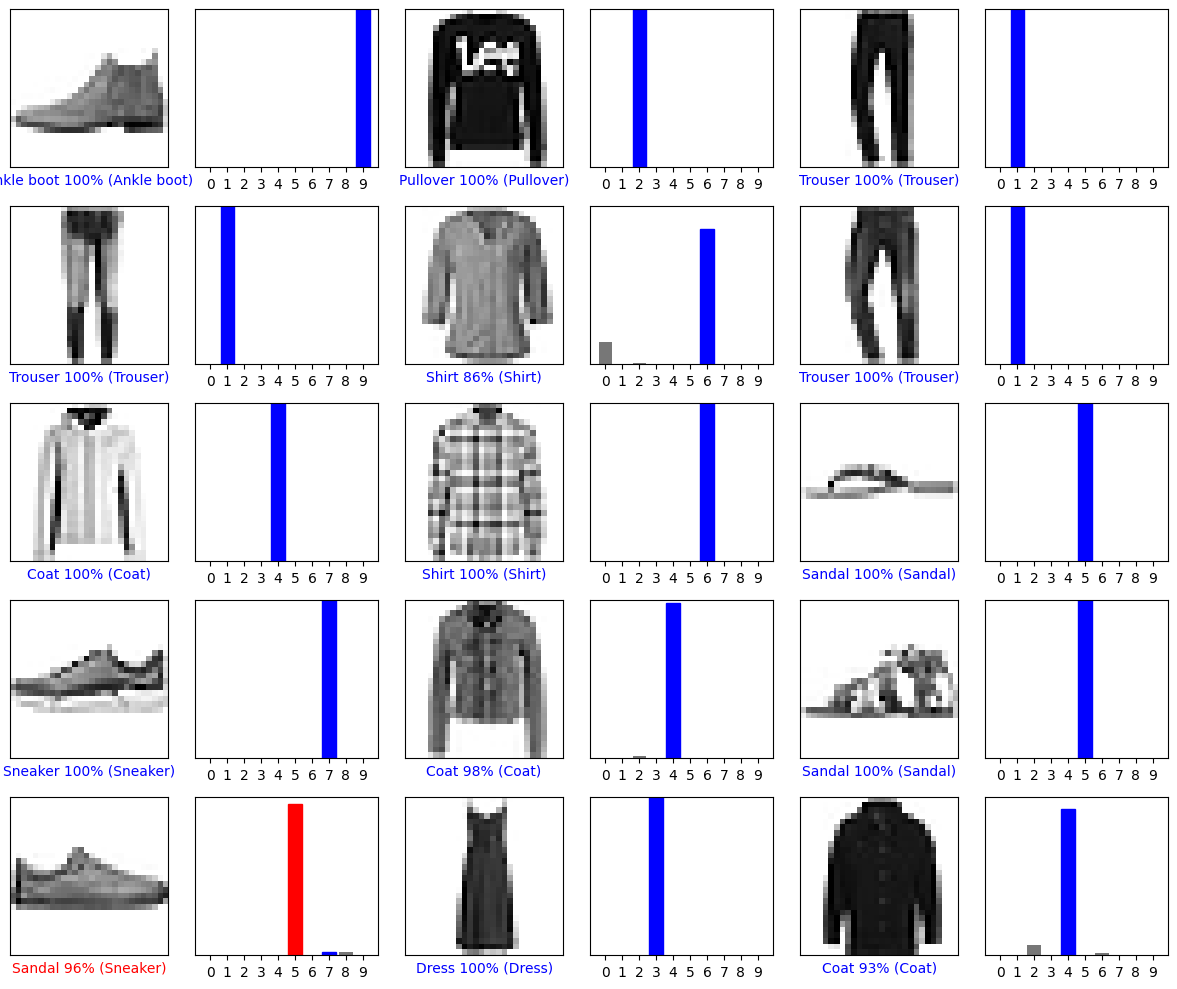

In [10]:
# Function to plot the value array
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot several images with predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [11]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [12]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [13]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[2.1819533e-04 9.4708914e-15 9.9891782e-01 4.0187385e-13 8.3196117e-04
  2.0533597e-11 3.2087948e-05 1.7665110e-19 5.8293013e-13 9.6733472e-17]]


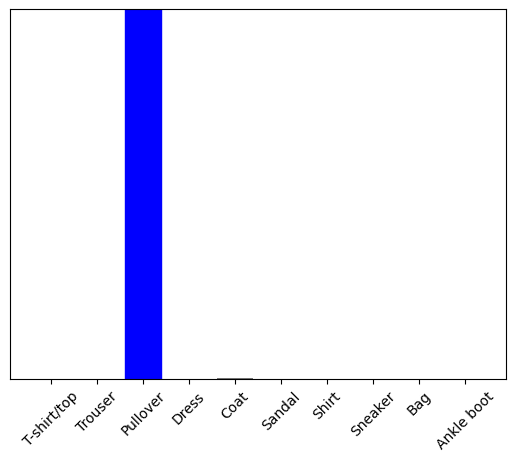

In [14]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [15]:
np.argmax(predictions_single[0])

2

After increasing the training to 15 epochs, the model predicts with a confidence level similar to the initial model. This suggests that the model remains confident in its prediction after more training epochs.


The increase did not negatively impact the model's ability to make the correct prediction on this image. Instead, the model maintains its high confidence, which could be indicative of better generalization if such performance is consistent across the entire test set.